In [1]:
from keras.datasets.mnist import load_data
import numpy as np
import torch
from scipy.special import logit
from torch.utils.data import TensorDataset, DataLoader

from mades import MADE_MOG
import torch.optim as optim
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt

In [2]:
def dequantize_and_rescale(x):
    """Assuming that x is from 0 to 255"""
    x = (x + np.random.uniform(0, 1, size=x.shape)) / 256
    lamb = 1e-6
    return logit(lamb + (1 - 2 * lamb) * x)

In [3]:
(x_train, _), (x_test, _) = load_data()

print(x_train.min(), x_train.max())
print(x_test.min(), x_test.max())

x_train = dequantize_and_rescale(x_train)
x_test = dequantize_and_rescale(x_test)

print(x_train.min(), x_train.max())
print(x_test.min(), x_test.max())

x_train = torch.from_numpy(x_train.reshape(-1, 784))
x_test = torch.from_numpy(x_test.reshape(-1, 784))

train_ds = TensorDataset(x_train[:1000])
test_ds = TensorDataset(x_test[:1000])

train_dl = DataLoader(train_ds, batch_size=10)
test_dl = DataLoader(test_ds, batch_size=10)

0 255
0 255
-13.815167364340232 13.8131698171493
-13.815305726131337 13.793811551058175


In [ ]:
dist = MADE_MOG(data_dim=28*28, hidden_dims=[1024, 1024], num_components=10)

In [4]:
dist = MADE_MOG(data_dim=28*28, hidden_dims=[1024, 1024], num_components=10)
opt = optim.Adam(dist.parameters(), lr=3e-4)

for i in range(100):

    losses_batch = []

    for (xb, ) in tqdm(train_dl):

        loss = -dist.log_prob(xb.float()).mean()

        opt.zero_grad()
        loss.backward()
        opt.step()

        losses_batch.append(float(loss))

    print(np.mean(losses_batch))

  0%|          | 0/100 [00:00<?, ?it/s]

2458.5321484375


  0%|          | 0/100 [00:00<?, ?it/s]

1571.5777917480468


  0%|          | 0/100 [00:00<?, ?it/s]

1455.9464477539063


  0%|          | 0/100 [00:00<?, ?it/s]

1400.4916821289062


  0%|          | 0/100 [00:00<?, ?it/s]

1367.0079223632813


  0%|          | 0/100 [00:00<?, ?it/s]

1343.7397131347657


  0%|          | 0/100 [00:00<?, ?it/s]

1328.21755859375


  0%|          | 0/100 [00:00<?, ?it/s]

1309.29810546875


  0%|          | 0/100 [00:00<?, ?it/s]

1290.0241345214845


  0%|          | 0/100 [00:00<?, ?it/s]

1273.7888623046874


  0%|          | 0/100 [00:00<?, ?it/s]

1259.9075634765625


  0%|          | 0/100 [00:00<?, ?it/s]

1247.4162866210938


  0%|          | 0/100 [00:00<?, ?it/s]

1235.839599609375


  0%|          | 0/100 [00:00<?, ?it/s]

1225.373134765625


  0%|          | 0/100 [00:00<?, ?it/s]

1225.444656982422


  0%|          | 0/100 [00:00<?, ?it/s]

1224.2581848144532


  0%|          | 0/100 [00:00<?, ?it/s]

[E thread_pool.cpp:109] Exception in thread pool task: mutex lock failed: Invalid argument
[E thread_pool.cpp:109] Exception in thread pool task: mutex lock failed: Invalid argument
[E thread_pool.cpp:109] Exception in thread pool task: mutex lock failed: Invalid argument
[E thread_pool.cpp:109] Exception in thread pool task: mutex lock failed: Invalid argument
[E thread_pool.cpp:109] Exception in thread pool task: mutex lock failed: Invalid argument


KeyboardInterrupt: 

In [ ]:
samples = dist.sample(1)

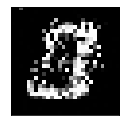

In [40]:
plt.figure(figsize=(2, 2))
lamb = 1e-6
plt.imshow((torch.sigmoid(samples[0].reshape(28, 28)) - 1e-6)/(1 - 2 * lamb), vmin=0, vmax=1, cmap="gray")
plt.xticks([])
plt.yticks([])
plt.show()